<a href="https://colab.research.google.com/github/gabrwell/analise_de_dados/blob/main/CP01_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/household_power_consumption.txt", sep=';')

/tmp/ipython-input-4025975215.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/household_power_consumption.txt", sep=';')


# **01 - Carregue o dataset e exibe as 10 primeiras linhas**

In [ ]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **02 diferença entre Global_active_power e Global_reactive_power**

Global_active_power: Esta coluna representa a potência ativa total consumida pela residência em quilowatts (kW). A potência ativa é a potência real que realiza trabalho útil, como acender lâmpadas, fazer funcionar motores, etc. É a energia que você realmente "usa" e pela qual paga na sua conta de eletricidade.

Global_reactive_power: Esta coluna representa a potência reativa total consumida pela residência em quilovolt-ampère reativo (kVAr). A potência reativa é a potência que não realiza trabalho útil diretamente, mas é necessária para criar campos magnéticos em equipamentos como motores, transformadores e reatores. Ela não é convertida em trabalho, mas é necessária para que a potência ativa possa ser entregue.

## **03 Verifique se tem valores ausentes e quantifique-os**

In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979
DayOfWeek,0


# **04 Converta a coluna Date para o tipo datetime e cria uma nova coluna com o dia da semana correspondente**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


# **05 Filtre os registros apenas do ano 2007 e calcule a média de consumo diário de Gblobal_active_power**

In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]

daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_avg_power_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


# **06. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.**



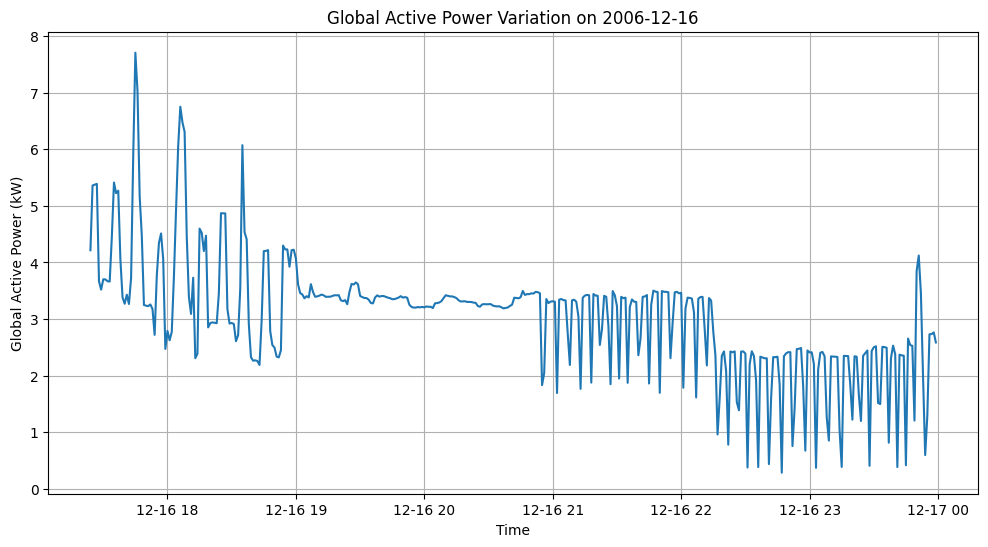

In [ ]:
import matplotlib.pyplot as plt

# Choose a specific day (e.g., the first day in the dataset)
date_to_plot = df['Date'].iloc[0]
df_single_day = df[df['Date'] == date_to_plot].copy()

# Combine 'Date' and 'Time' columns for plotting
df_single_day['Datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_single_day['Datetime'], df_single_day['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title(f'Global Active Power Variation on {date_to_plot.strftime("%Y-%m-%d")}')
plt.grid(True)
plt.show()

# **07. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

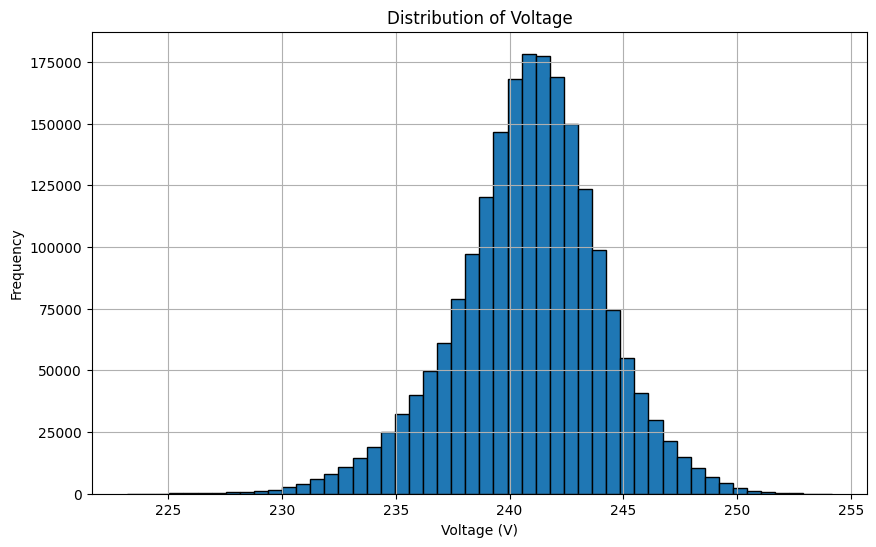

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Voltage' column is numeric
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Drop rows with NaN values in 'Voltage' if any resulted from coercion
df.dropna(subset=['Voltage'], inplace=True)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.grid(True)
plt.show()

# **08. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_power = df.groupby('Month')['Global_active_power'].mean()
display(monthly_avg_power)

,Global_active_power
Month,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


# **09. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [ ]:
daily_power_sum = df.groupby('Date')['Global_active_power'].sum()
day_with_highest_consumption = daily_power_sum.idxmax()
highest_consumption_value = daily_power_sum.max()

print(f"O dia com maior consumo de energia ativa global é: {day_with_highest_consumption.strftime('%Y-%m-%d')}")
print(f"Valor do maior consumo: {highest_consumption_value:.2f} kW")

O dia com maior consumo de energia ativa global é: 2006-12-23
Valor do maior consumo: 4773.39 kW


# **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [ ]:
# Create a new column to identify weekdays and weekends
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Final de semana' if x in ['Saturday', 'Sunday'] else 'Dia de semana')

# Calculate the average Global_active_power for each day type
average_power_by_daytype = df.groupby('DayType')['Global_active_power'].mean()

display(average_power_by_daytype)

,Global_active_power
DayType,
Dia de semana,1.035472
Final de semana,1.234232


# ***15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).***

In [27]:
# Filter for summer months (June, July, August) in the Northern Hemisphere
summer_months = [6, 7, 8]
df_summer = df[df['Date'].dt.month.isin(summer_months)]

# Calculate the average Global_active_power for summer
average_power_summer = df_summer['Global_active_power'].mean()

# Filter for winter months (December, January, February) in the Northern Hemisphere
winter_months = [12, 1, 2]
df_winter = df[df['Date'].dt.month.isin(winter_months)]

# Calculate the average Global_active_power for winter
average_power_winter = df_winter['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão (Hemisfério Norte): {average_power_summer:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno (Hemisfério Norte): {average_power_winter:.2f} kW")

Consumo médio de energia ativa global no verão (Hemisfério Norte): 0.73 kW
Consumo médio de energia ativa global no inverno (Hemisfério Norte): 1.42 kW


# ***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa***

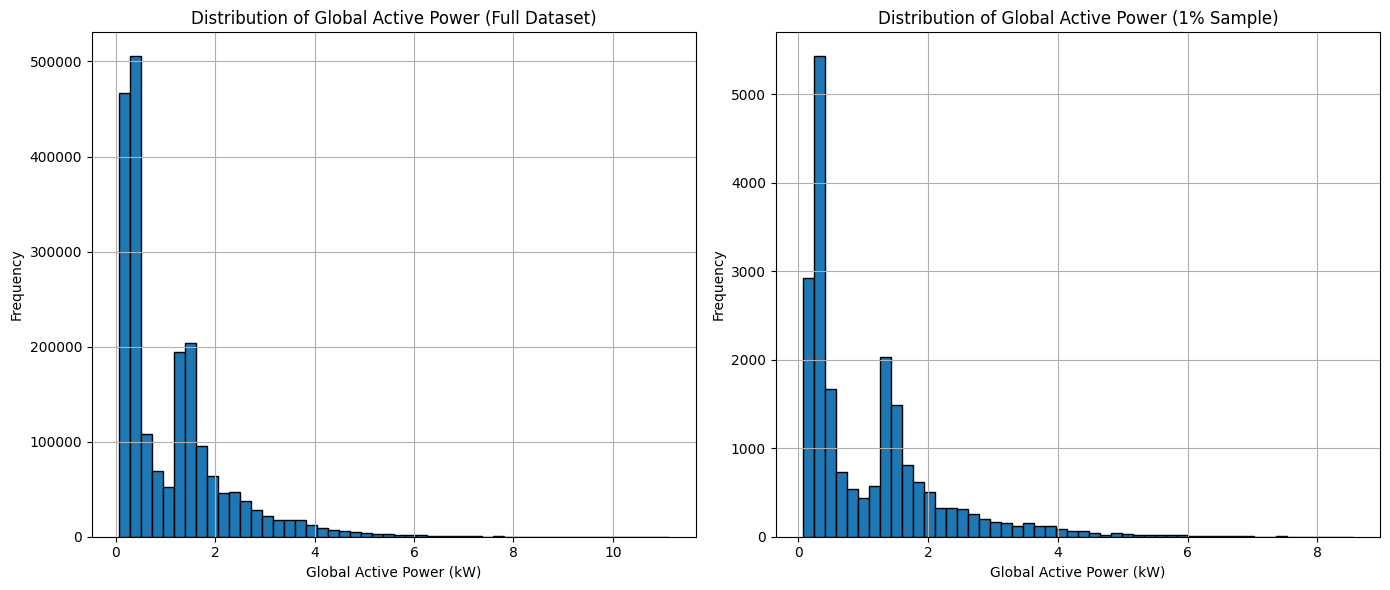

In [28]:
# Take a random sample of 1% of the data
df_sample = df.sample(frac=0.01, random_state=42) # Using a random state for reproducibility

# Create histograms for the original and sampled data
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(df['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power (Full Dataset)')
plt.grid(True)

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(df_sample['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power (1% Sample)')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

# ***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.***



In [29]:
from sklearn.preprocessing import MinMaxScaler

# Identify the numerical columns to scale
# Exclude 'Date', 'Time', 'DayOfWeek', 'Month', 'DayType' as they are not numerical or not suitable for scaling
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical columns
df_scaled = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,2006-12,Final de semana
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,2006-12,Final de semana
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana


# ***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.***

# Task
Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [30]:
daily_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()
display(daily_consumption.head())

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [31]:
# Select the 'Global_active_power' column
daily_power = daily_consumption['Global_active_power']

# Reshape the data into a 2D array for K-means
X = daily_power.values.reshape(-1, 1)

# Display the shape of the reshaped data
print(f"Shape of the data for K-means: {X.shape}")

Shape of the data for K-means: (1433, 1)


In [32]:
from sklearn.cluster import KMeans

# Instantiate a KMeans object with n_clusters=3 and a random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the KMeans model to the prepared data X using the .fit() method
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [33]:
daily_consumption['Cluster'] = kmeans.labels_
display(daily_consumption.head())

,Date,Global_active_power,Cluster
0,2006-12-16,1209.176,0
1,2006-12-17,3390.460,1
2,2006-12-18,2203.826,1
3,2006-12-19,1666.194,2
4,2006-12-20,2225.748,1


Average Global Active Power per Cluster:


,Global_active_power
Cluster,
0,948.238891
1,2550.739361
2,1680.531847


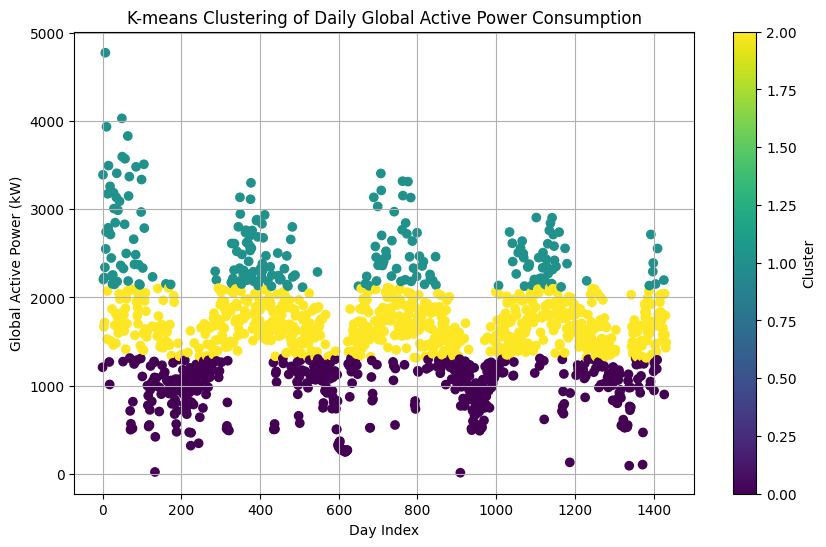

In [34]:
# Calculate the average consumption for each cluster
average_consumption_per_cluster = daily_consumption.groupby('Cluster')['Global_active_power'].mean()

# Display the average consumption per cluster
print("Average Global Active Power per Cluster:")
display(average_consumption_per_cluster)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_consumption.index, daily_consumption['Global_active_power'], c=daily_consumption['Cluster'], cmap='viridis')
plt.xlabel('Day Index')
plt.ylabel('Global Active Power (kW)')
plt.title('K-means Clustering of Daily Global Active Power Consumption')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.*`**

In [35]:
# Ensure 'Date' column is datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Define the start and end dates for a 6-month period in 2007
start_date = '2007-01-01'
end_date = '2007-06-30'

# Filter the DataFrame for the defined period
df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Display the first few rows of the filtered DataFrame
display(df_period.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.600,0.000,0.000,0.0,Monday,2007-01,Dia de semana
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana


In [36]:
# Combine 'Date' and 'Time' columns to create a 'Datetime' index
df_period['Datetime'] = pd.to_datetime(df_period['Date'].astype(str) + ' ' + df_period['Time'])
df_period.set_index('Datetime', inplace=True)

# Resample 'Global_active_power' to daily frequency and calculate the mean
daily_power_series = df_period['Global_active_power'].resample('D').mean()

# Display the first few entries of the resampled time series
display(daily_power_series.head())

,Global_active_power
Datetime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


In [38]:
# Handle missing values by interpolating them
daily_power_series_filled = daily_power_series.interpolate()

# Apply seasonal_decompose to the filled daily_power_series
decomposition = seasonal_decompose(daily_power_series_filled, model='additive', period=7)

**Reasoning**:
Plot the results of the seasonal decomposition to visualize the trend, seasonality, and residuals.



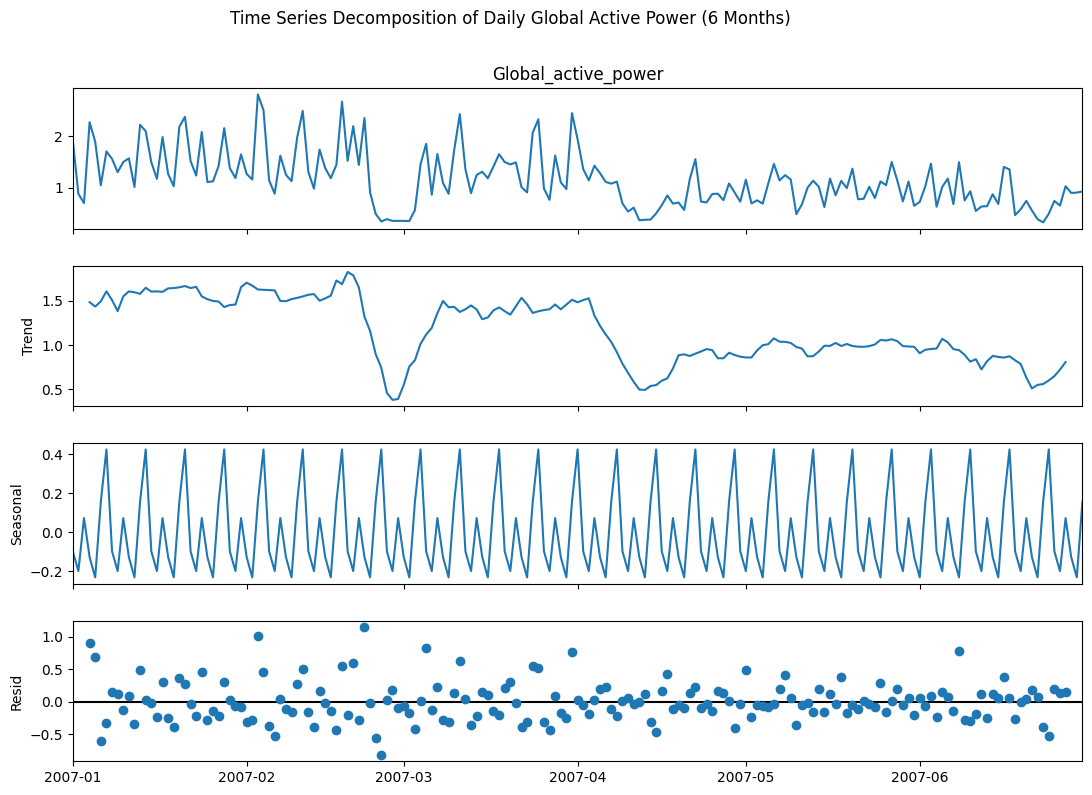

In [39]:
# Plot the decomposed time series
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Daily Global Active Power (6 Months)', y=1.02)
plt.show()

# ***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo***

In [41]:
# Define the feature matrix (X) and target variable (y)
X = df[['Global_intensity']]
y = df['Global_active_power']

display(X.head())
display(y.head())

,Global_intensity
0,18.400
1,23.000
2,23.000
3,23.000
4,15.800


,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1639424, 1)
Shape of X_test: (409856, 1)
Shape of y_train: (1639424,)
Shape of y_test: (409856,)


In [43]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the instantiated model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Display the first few predictions
print("First 5 predictions:")
print(y_pred[:5])

First 5 predictions:
[1.51274978 0.41965701 0.70481164 0.32460546 1.32264669]


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0025
R-squared (R2): 0.9978
